In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as mplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Cargamos el dataset y mostramos las 5 primeras filas
conjuntoDatos = pd.read_csv("./Mall_Customers.csv")
conjuntoDatos.head()

,Id_Clientes,Genero,Edad,Annual_Income_Kg,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
conjuntoDatos.isna().sum()

Id_Clientes         0
Genero              0
Eda                 0
Annual_Income_Kg    0
Spending_Score      0
dtype: int64

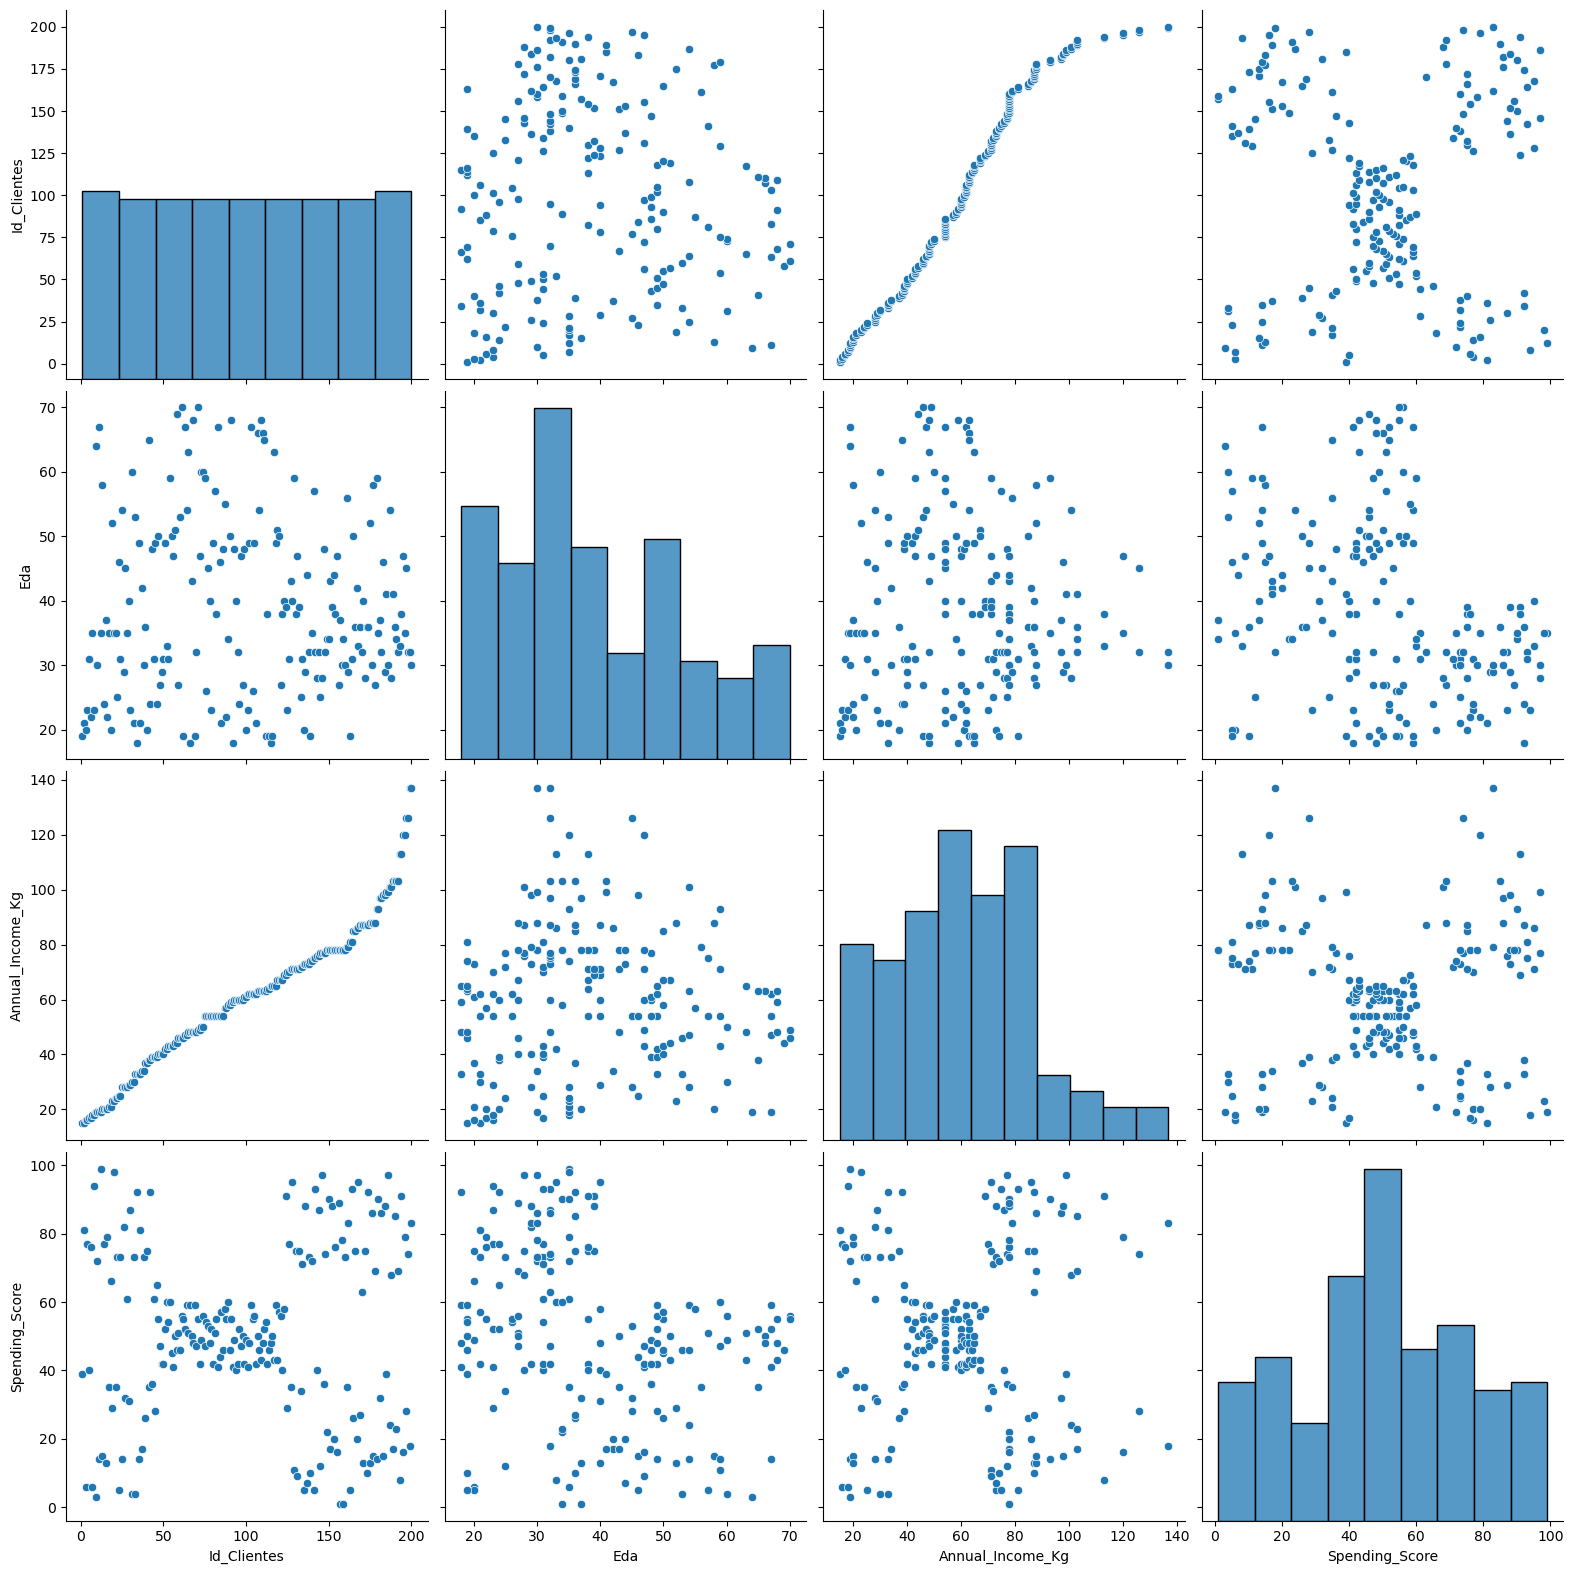

In [6]:
sns.pairplot(conjuntoDatos.dropna(), size=4,kind='scatter')

In [8]:
# Matriz de correlación
#corr_matrix = conjuntoDatos.corr()
#corr_matrix

<Axes: >

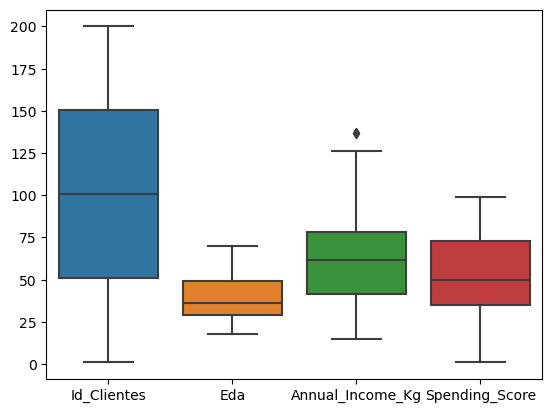

In [9]:
sns.boxplot(data = conjuntoDatos)

In [14]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(conjuntoDatos), columns = conjuntoDatos.columns)
X

ValueError: could not convert string to float: 'Male'

<Axes: >

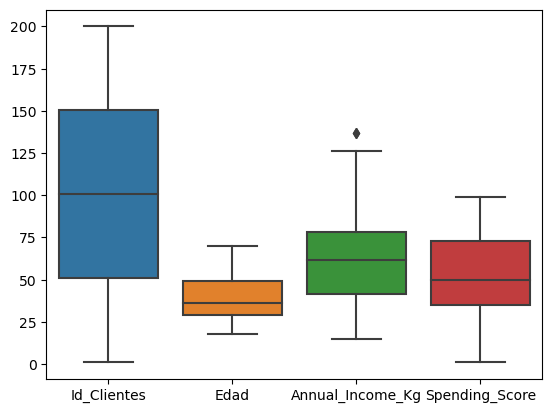

In [11]:
sns.boxplot(data = conjuntoDatos)

K-MEANS

In [12]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
mplot.plot(Nc,score, marker='o')
mplot.xlabel('Número de Clusters')
mplot.ylabel('Score')
mplot.title('Elbow Curve')
mplot.show()

NameError: name 'X' is not defined

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

In [ ]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

In [ ]:
f1 = X['sepal_length'].values
f2 = X['sepal_width'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [ ]:
f1 = X['petal_length'].values
f2 = X['petal_width'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [ ]:
f1 = X['sepal_length'].values
f2 = X['petal_length'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

In [ ]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

In [ ]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

In [ ]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

In [ ]:
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [ ]:
f1 = X['sepal_length'].values
f2 = X['sepal_width'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

In [ ]:
plot_dendrogram(hier_clustering, color_threshold=0)

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [ ]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

In [ ]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)